In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc

In [6]:
Calcium_Data = pd.read_csv('AnkCtrlD1.csv', sep=',',na_values=".")

In [7]:
Calcium_Data

,ID,Type,Tau
0,Fura 1,Ctrl,0.513
1,Fura 2,Ctrl,0.550
2,Fura 3,Ctrl,0.533
3,Fura 4,Ctrl,0.483
4,Fura 5,Ctrl,0.523
5,Fura 6,Ctrl,0.516
6,Fura 7,Ctrl,0.310
7,Fura 10,Ank,0.551
8,Fura 11,Ank,0.317
9,Fura 12,Ank,0.526


In [8]:
pd.DataFrame.describe(Calcium_Data)

,Tau
count,14.000000
mean,0.480929
std,0.085839
min,0.310000
25%,0.485750
50%,0.518500
75%,0.531250
max,0.551000


In [9]:
groupby_cell = Calcium_Data.groupby('Type')

In [10]:
for type, value in groupby_cell['Tau']:
    print((type, value.mean()))

('Ank', np.float64(0.47214285714285714))
('Ctrl', np.float64(0.48971428571428577))


In [11]:
groupby_cell.mean(numeric_only=True)

,Tau
Type,
Ank,0.472143
Ctrl,0.489714


In [12]:
grouped_calc = Calcium_Data.groupby('Type')['Tau'].mean().reset_index()

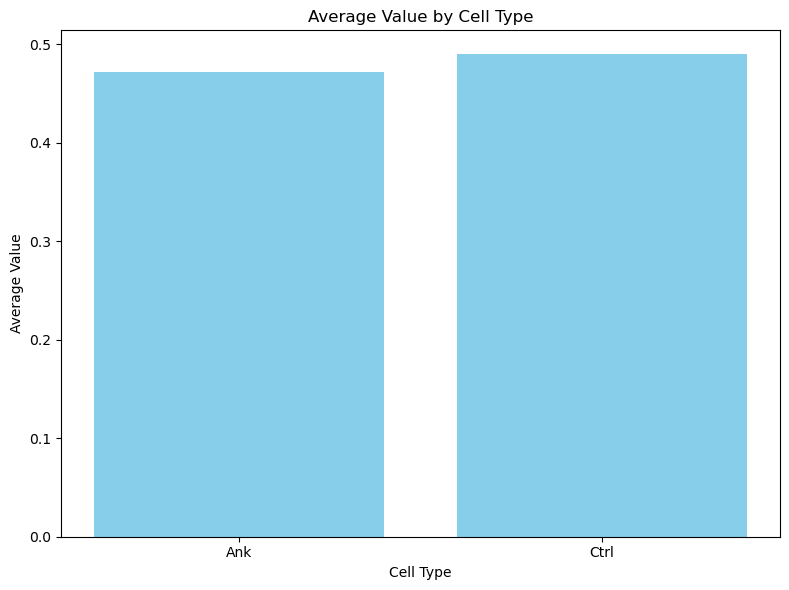

In [13]:
plt.figure(figsize=(8, 6))
plt.bar(grouped_calc['Type'], grouped_calc['Tau'], color='skyblue')
plt.xlabel('Cell Type')
plt.ylabel('Average Value')
plt.title('Average Value by Cell Type')
plt.tight_layout()
plt.show()

/tmp/ipykernel_632/3679013321.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = Calcium_Data.groupby('Type')['Tau'].mean()
/tmp/ipykernel_632/3679013321.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_values = Calcium_Data.groupby('Type')['Tau'].std()
/tmp/ipykernel_632/3679013321.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = Calcium_Data.groupby('Type')['Tau'].median()


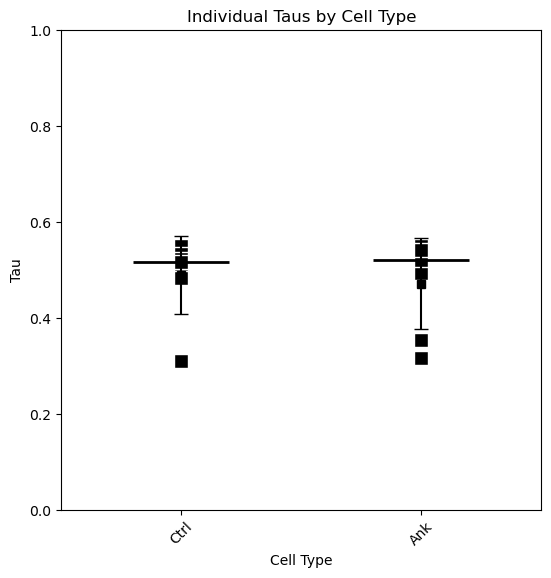

In [14]:

Calcium_Data['Type'] = pd.Categorical(Calcium_Data['Type'], categories=['Ank', 'Ctrl'])

# Calculate the mean, standard deviation, and median for each cell type
mean_values = Calcium_Data.groupby('Type')['Tau'].mean()
std_values = Calcium_Data.groupby('Type')['Tau'].std()
median_values = Calcium_Data.groupby('Type')['Tau'].median()

# Create the plot
plt.figure(figsize=(6, 6))

# Plot individual data points (scatter plot)
plt.scatter(Calcium_Data['Type'], Calcium_Data['Tau'], marker= 's', color='black', alpha= 1, edgecolors='w', s=100)
plt.xticks(rotation=45)

for i, cell_type in enumerate(Calcium_Data['Type'].unique()):
    # Get the mean, std, and median for each cell type
    cell_mean = mean_values[cell_type]
    cell_std = std_values[cell_type]
    cell_median = median_values[cell_type]
    
    # The x position should be the index of the current cell type (numeric position for categorical data)
    x_position = i  # Here 'i' is the index of the current category (0 for 'Ank', 1 for 'Ctrl')
    
    # Plot the error bar (standard deviation) for this cell type
    plt.errorbar(x_position, cell_mean, yerr=cell_std, fmt='s', color='black', capsize=5, linestyle='None')
    
    # Add a horizontal line for the median value of this cell type
    plt.hlines(cell_median, x_position - 0.2, x_position + 0.2, colors='black', linewidth=2, 
               label=f'{cell_type} median' if i == 0 else "")  # Add label only for the first category ('Ank')


# Add labels and title
plt.xlabel('Cell Type')
plt.ylabel('Tau')
plt.title('Individual Taus by Cell Type')
plt.ylim(0,1.0)
plt.xlim(-0.5, len(Calcium_Data['Type'].unique()) - 0.5)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show the plot

plt.show()

/tmp/ipykernel_632/3622680387.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=Calcium_Data, x='Type', y='Tau', color='black', marker= 's', s=100, edgecolor='w', alpha=1, palette="deep")
/tmp/ipykernel_632/3622680387.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = Calcium_Data.groupby('Type')['Tau'].mean()
/tmp/ipykernel_632/3622680387.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_values = Calcium_Data.groupby('Type')['Tau'].std()
/tmp/ipykernel_632/3622680387.py:21: FutureWarning: The default of observed=False is deprecate

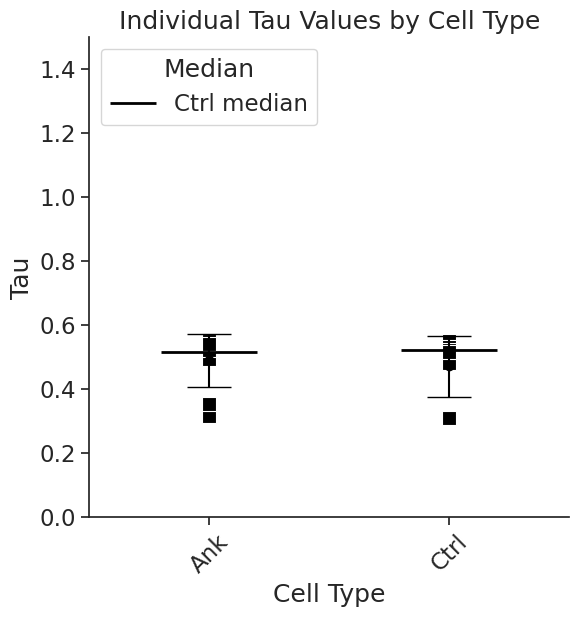

In [25]:

# Create the plot
plt.figure(figsize=(6, 6))


sns.set_style("ticks")
sns.despine()

# Create a scatter plot with Seaborn (individual points)
sns.scatterplot(data=Calcium_Data, x='Type', y='Tau', color='black', marker= 's', s=100, edgecolor='w', alpha=1, palette="deep")
sns.despine()
# Add error bars representing standard deviation (using groupby to calculate)
# We need to calculate the means and standard deviations first
mean_values = Calcium_Data.groupby('Type')['Tau'].mean()
std_values = Calcium_Data.groupby('Type')['Tau'].std()

# Add error bars (standard deviation)
for i, cell_type in enumerate(Calcium_Data['Type'].unique()):
    plt.errorbar(x=i, y=mean_values[cell_type], yerr=std_values[cell_type], fmt='o', color='black', capsize=16, linestyle='None')

# Add horizontal lines for the median of each cell type
median_values = Calcium_Data.groupby('Type')['Tau'].median()
for i, cell_type in enumerate(Calcium_Data['Type'].unique()):
    plt.hlines(median_values[cell_type], i - 0.2, i + 0.2, colors='black', linewidth=2, label=f'{cell_type} median' if i == 0 else "")

# Customize the plot
plt.xlabel('Cell Type')
plt.ylabel('Tau')
plt.title('Individual Tau Values by Cell Type')
plt.xticks(rotation=45)
plt.ylim(0, 1.5)
plt.xlim(-0.5, len(Calcium_Data['Type'].unique()) - 0.5)

# Adjust the layout and show the plot
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.legend(title='Median', loc='upper left')
plt.show()

In [29]:
ank_tau = Calcium_Data[Calcium_Data['Type'] == 'Ank']['Tau']
ctrl_tau = Calcium_Data[Calcium_Data['Type'] == 'Ctrl']['Tau']
sc.stats.ttest_ind(ank_tau, ctrl_tau)  

TtestResult(statistic=np.float64(-0.37003067573592274), pvalue=np.float64(0.7178078781847521), df=np.float64(12.0))